/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:25: FutureWarning: The provided callable <function mean at 0x10b00cfe0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_df = cpu_df.groupby('vox_per_chunk')['time'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:25: FutureWarning: The provided callable <function std at 0x10b00d120> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_df = cpu_df.groupby('vox_per_chunk')['time'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:25: FutureWarning: The provided callable <function mean at 0x10b00cfe0> is currently using SeriesGro

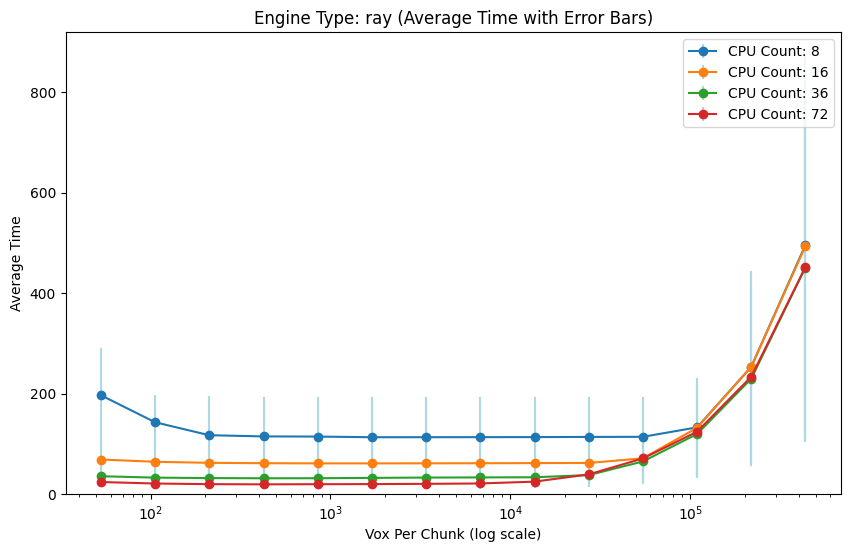

/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_df['total_cpu_time'] = cpu_df['time'] * cpu_df['cpu_count']
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:55: FutureWarning: The provided callable <function mean at 0x10b00cfe0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_df = cpu_df.groupby('vox_per_chunk')['total_cpu_time'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_81499/92714388.py:55: FutureWarning: The provided callable <function std at 0x10b00

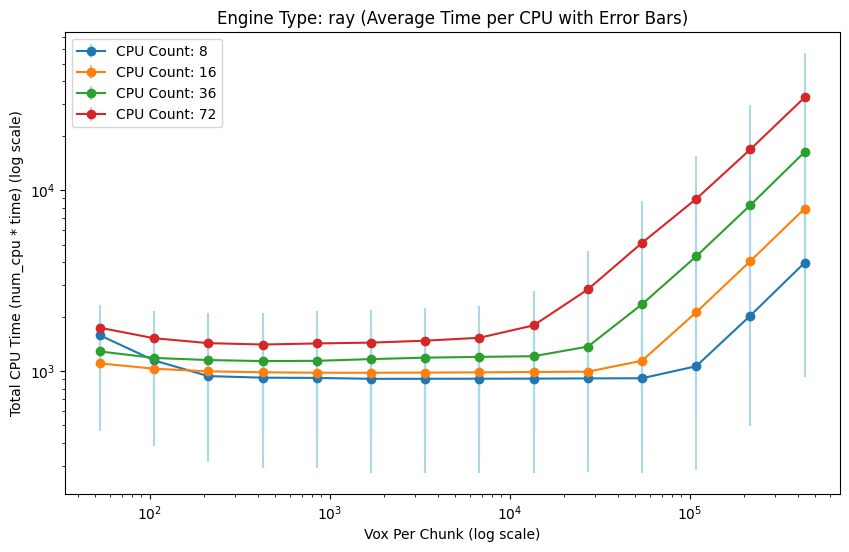

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('CpuTests.csv')

# Get unique engine types
engine_types = df['engine'].unique()

# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time'
        grouped_df = cpu_df.groupby('vox_per_chunk')['time'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Average Time')
    ax.legend()  # Add a legend
    plt.show()

# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Add a new column 'time_per_cpu' which is 'time' divided by 'cpu_count'
        cpu_df['total_cpu_time'] = cpu_df['time'] * cpu_df['cpu_count']

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time_per_cpu'
        grouped_df = cpu_df.groupby('vox_per_chunk')['total_cpu_time'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_yscale('log')  # Make y-axis logarithmic
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time per CPU with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Total CPU Time (num_cpu * time) (log scale)')
    ax.legend()  # Add a legend
    plt.show()


In [ ]:
# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Add a new column 'time_per_cpu' which is 'time' divided by 'cpu_count'
        cpu_df['total_cpu_time'] = cpu_df['time'] * cpu_df['cpu_count']

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time_per_cpu'
        grouped_df = cpu_df.groupby('vox_per_chunk')['total_cpu_time'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_yscale('log')  # Make y-axis logarithmic
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time per CPU with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Total CPU Time (num_cpu * time) (log scale)')
    ax.legend()  # Add a legend
    plt.show()

In [ ]:
# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Add a new column 'time_per_cpu' which is 'time' divided by 'cpu_count'
        cpu_df['time_per_cpu'] = cpu_df['time'] / cpu_df['cpu_count']

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time_per_cpu'
        grouped_df = cpu_df.groupby('vox_per_chunk')['time_per_cpu'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time per CPU with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Average Time per CPU')
    ax.legend()  # Add a legend
    plt.show()

In [ ]:
# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Add a new column 'time_per_cpu' which is 'time' divided by 'cpu_count'
        cpu_df['time_per_cpu'] = cpu_df['time'] / cpu_df['cpu_count']

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time_per_cpu'
        grouped_df = cpu_df.groupby('vox_per_chunk')['time_per_cpu'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time per CPU with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Average Time per CPU')
    ax.legend()  # Add a legend
    plt.show()

In [ ]:
# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Get unique cpu_count values
    cpu_counts = engine_df['cpu_count'].unique()

    fig, ax = plt.subplots(figsize=(10, 6))

    # For each cpu_count, plot a line
    for cpu_count in cpu_counts:
        cpu_df = engine_df[engine_df['cpu_count'] == cpu_count]

        # Add a new column 'time_per_cpu' which is 'time' divided by 'cpu_count'
        cpu_df['time_per_cpu'] = cpu_df['time'] / cpu_df['cpu_count']

        # Group by 'vox_per_chunk' and calculate the mean and std of 'time_per_cpu'
        grouped_df = cpu_df.groupby('vox_per_chunk')['time_per_cpu'].agg([np.mean, np.std]).reset_index()

        ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=f'CPU Count: {cpu_count}')

    ax.set_xscale('log')
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time per CPU with Error Bars)')
    ax.set_xlabel('Vox Per Chunk (log scale)')
    ax.set_ylabel('Average Time per CPU')
    ax.legend()  # Add a legend
    plt.show()